# Agreements: 
## * capital letters for the preprocessed data

# 1. Loading data and visualization

In [1]:
import numpy as np

In [2]:
data  = np.genfromtxt("ex2data1.txt", delimiter = ",")

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Taking the data where it is 1 using numpy functions
y_equal_1 = data[data[:,2] == 1]
y_equal_0 = data[data[:,2] == 0]

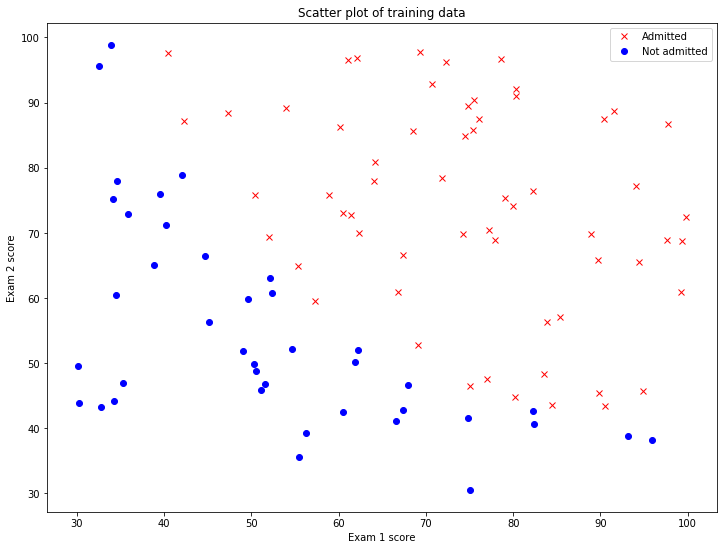

In [8]:
plt.plot(y_equal_1[:,0], y_equal_1[:,1], 'rx')
plt.plot(y_equal_0[:,0], y_equal_0[:,1], 'bo')
plt.title("Scatter plot of training data")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(('Admitted','Not admitted'))

### Note: below is the code to change the size of the plot 

In [6]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size:", fig_size)

In [7]:
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### Rerun your plot after chaning its size

# 2. Preprocessing

In [9]:
x_raw = data[:,:2]

In [10]:
#shapes
m = x_raw.shape[0] #number of samples
n = x_raw.shape[1] + 1 #number of features

In [11]:
#initialization of theta
Theta = np.array([0,0,0])

In [12]:
Y = data[:,2]

In [13]:
(Y.T).shape

(100,)

In [14]:
#0 for position, 1 is value, axis = 1 is every row
X = np.insert(x_raw, 0, 1, axis = 1)

### Note: Check for the dimensions in order to use vectorization properly

In [15]:
Theta.shape

(3,)

In [16]:
X.shape

(100, 3)

# 3. Implementation

    Cheat Sheet:

<img src="logistic.png">

In [17]:
# sigmoid function that should return hypothesis array
#def sigmoid(X,Theta):
H = 1/(1 + np.exp(-1 * np.dot(X,Theta)))

In [18]:
X.shape

(100, 3)

In [19]:
Theta.shape

(3,)

In [20]:
H.shape

(100,)

In [21]:
H

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

### Cost Function with Theta = [0,0,0]

In [22]:
mean_x1 = np.mean(X[:,1])
mean_x2 = np.mean(X[:,2])
std_x1 = np.std(X[:,1])
std_x2 = np.std(X[:,2])

In [23]:
X_norm = X

In [24]:
X_norm[:,1] = (X_norm[:,1] - mean_x1) / std_x1
X_norm[:,2] = (X_norm[:,2] - mean_x2) / std_x2

In [25]:
def cost(h, y):
    cost = (-1/m) * (y.T @ np.log(h) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

In [26]:
cost(H, Y)

0.6931471805599452

In [27]:
np.log(H).shape

(100,)

In [28]:
Y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
Y.shape

(100,)

### Gradient Descent Implementation

In [30]:
def mySigmoid(x, theta):
    h = 1/(1+np.exp(-np.dot(X,theta)))
    return h

In [31]:
Theta = np.array([0,0,0])

In [32]:
#%%time

cost_list = [] #in order to the change in the cost after each iteration
iterations = []
previous_cost = 0

for i in range(2000):
    
    Theta = Theta - (0.1/100) * (X_norm.T @ (mySigmoid(X_norm,Theta) - Y))
    
    H = mySigmoid(X_norm,Theta) #New Hypothesis after each iteration
    
    cost_val = cost(H, Y) #New Cost after each iteration
    cost_list.append(cost_val) #Saving them
    iterations.append(i)
    
    if (abs(cost_val - previous_cost) <= 0.00001):  
        iteration_break = i
        break
    else:
        previous_cost = cost_val

In [33]:
iteration_break

1120

In [34]:
Theta

array([1.31342865, 3.13670569, 2.89778383])

# 4. Results and Discussion

    Obtained Theta values are 1.50553399, 3.54060004, 3.28777073 after 2000 iterations and at alpha 0.1.

## 4.1 Cost and Alpha value

In [35]:
cost_list #you should see the cost is decreasing

[0.6781246963007578,
 0.66382741095537,
 0.6502189347748325,
 0.6372638011294858,
 0.6249276349768507,
 0.6131772824536355,
 0.6019809053902057,
 0.5913080448617392,
 0.581129657968826,
 0.5714181319373621,
 0.5621472793949616,
 0.5532923183637234,
 0.5448298401440202,
 0.53673776787996,
 0.5289953082157878,
 0.5215828980887389,
 0.5144821483673814,
 0.5076757857407512,
 0.5011475939948845,
 0.49488235557968735,
 0.48886579416897574,
 0.4830845187474487,
 0.4775259696173653,
 0.4721783666015385,
 0.46703065962474805,
 0.46207248177974974,
 0.45729410492389855,
 0.4526863978054734,
 0.44824078668284983,
 0.44394921837274987,
 0.4398041256442569,
 0.43579839486166516,
 0.4319253357703677,
 0.4281786533148617,
 0.42455242137575483,
 0.4210410583126992,
 0.4176393042019316,
 0.4143421996600938,
 0.4111450661499061,
 0.40804348766777737,
 0.40503329371833097,
 0.40211054348594927,
 0.3992715111186254,
 0.39651267204459884,
 0.39383069024731837,
 0.3912224064292114,
 0.38868482699946827,
 0.

### Try to change the value of 'alpha' and choose the fastest cost

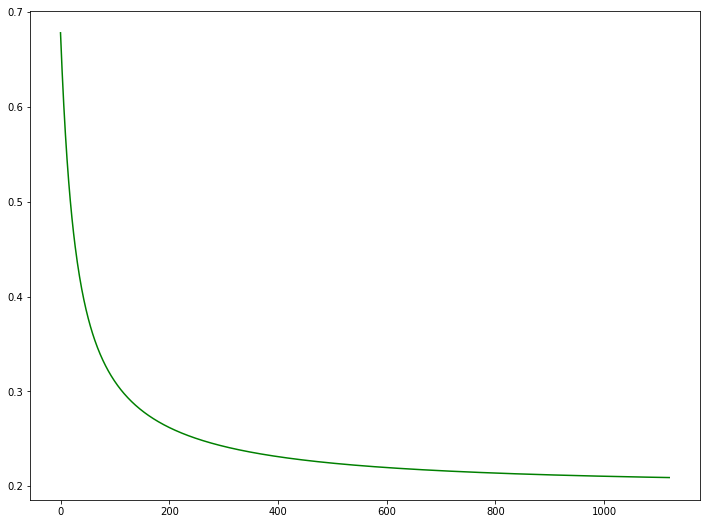

In [36]:
plt.plot(iterations, cost_list, 'g')

## 4.2 Updated Hypothesis Function

        Obtained Hypothesis function, which has values ranging from 0 to 1. They are written in scientific notation because of numpy.

In [37]:
H = 1/(1 + np.exp(-1 * np.dot(X_norm,Theta)))

In [38]:
H

array([1.34403076e-01, 3.65385640e-04, 7.81946298e-02, 9.72790972e-01,
       9.92697809e-01, 2.73794518e-02, 9.95157043e-01, 4.38005085e-01,
       9.98220335e-01, 6.90310888e-01, 8.60719298e-01, 6.00338000e-02,
       9.96392139e-01, 9.98944289e-01, 2.01349917e-01, 9.53672084e-01,
       4.39197097e-01, 2.01578289e-01, 9.98188250e-01, 5.56627132e-01,
       1.11904471e-01, 9.94181039e-01, 2.07095413e-02, 7.24767528e-04,
       9.76660296e-01, 7.94437068e-01, 5.78374442e-01, 8.12505846e-01,
       1.41030789e-01, 3.80442488e-02, 8.39513487e-01, 9.55963470e-01,
       2.03492401e-01, 4.04545842e-01, 1.16314282e-01, 6.50321230e-02,
       7.84076014e-01, 9.66989992e-01, 2.55783894e-01, 8.54380961e-02,
       9.38065421e-01, 1.78893410e-02, 9.97204477e-01, 5.02572677e-01,
       1.40845816e-02, 1.88421574e-01, 9.79131178e-01, 9.99940667e-01,
       9.96019210e-01, 9.99880876e-01, 9.92421930e-01, 9.97383020e-01,
       8.54424300e-01, 9.55170343e-03, 2.30274505e-02, 9.16866218e-02,
      

## 4.3 Decision Boundary

In [39]:
Theta

array([1.31342865, 3.13670569, 2.89778383])

       Since theta0 + theta1 * x1 + theta2 * x2 = 0 is the decision boundary. To draw it, it is necessary to find x2 values as a function of x1 and theta. So x2 = (-theta0 - theta1 * x1)/theta2. The obained values of x2 are saved into new list.

In [40]:
X2 = []
for i in range(100):
    x2 = (-Theta[0] - Theta[1] * X_norm[i,1]) / Theta[2]
    #x2 = (-Theta[0] - Theta[1] * X) / Theta[2]
    X2.append(x2)

    Since new theta was obtained based on normalized values of x, the graph also should have other dimensions:

In [41]:
class_1_x1 = (y_equal_1[:,0] - mean_x1)/std_x1
class_1_x2 = (y_equal_1[:,1] - mean_x2)/std_x2
class_2_x1 = (y_equal_0[:,0] - mean_x1)/std_x1
class_2_x2 = (y_equal_0[:,1] - mean_x2)/std_x2

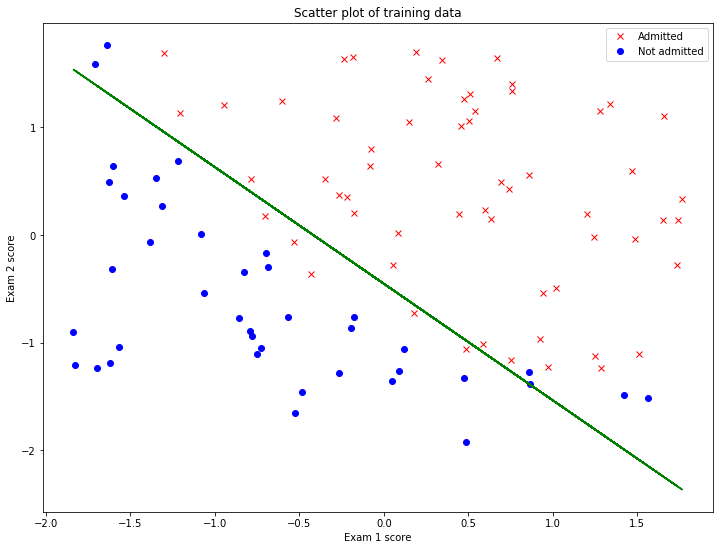

In [42]:
plt.plot(class_1_x1, class_1_x2, 'rx')
plt.plot(class_2_x1, class_2_x2, 'bo')
plt.plot(X_norm[:,1], X2, 'g')
plt.title("Scatter plot of training data")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(('Admitted','Not admitted'))

## 4.3 Why normalization made sense and impacted all the results?

> Understood with the help of Mayur 
https://stackoverflow.com/questions/36229340/divide-by-zero-encountered-in-log-when-not-dividing-by-zero/36229376 

        Sigmoid function represented below when accepts values for t higher or equal than 40 outputs 1. And since sigmoid is our hypothesis and initial data contains high values for t, the hypothesis has been 1 (meaning our hypothesis classifies everything as 1st class). 

> sig(t) = (1/(1+np.exp(-t))

<img src="Sigmoid-function-2.svg.png">

#### Try to change the value inside of sigmoid function as 40 and 36 and see this observation.

In [43]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [44]:
sigmoid(40)

1.0

In [45]:
sigmoid(36)

0.9999999999999998

# The End.